In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [2]:
training_data = []

def createDataSet(resolution, train_size,test_size):
    directory = "/home/phalguna/Documents/PetImages/"
    categories = ["Dog","Cat"]
    test_data = []
    for cat in categories: 
        path = os.path.join(directory,cat)
        class_num = categories.index(cat)
        
        trainList = os.listdir(path)[:train_size]
        testList = os.listdir(path)[train_size + 1: test_size + train_size + 1]
        i = 0
        cv_imgs = []
        for img in trainList:
            if i >= train_size:
                break
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                newArr = cv2.resize(img_array, (resolution,resolution))
                cv_imgs.append(newArr)
                training_data.append([newArr,class_num])
                i+=1
            except Exception as e:
                pass
        i = 0
        for img in testList:
            if i >= test_size:
                break
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                newArr = cv2.resize(img_array, (resolution,resolution))
                test_data.append([newArr,class_num])
                
                i+=1
            except Exception as e:
                pass
            

    x_train = []
    y_train = []

    x_test = []
    y_test = []
    
    for features, label in training_data:
        x_train.append(features)
        y_train.append(label)

    for features, label in test_data:
        x_test.append(features)
        y_test.append(label)
        
    x_train = np.array(x_train).reshape(-1,resolution,resolution,1)
    x_test = np.array(x_test).reshape(-1,resolution,resolution,1)

    plt.subplot(5,2,1)
    plt.imshow(cv_imgs[0], cmap='gray')
    plt.subplot(5,2,2)
    plt.imshow(cv_imgs[1], cmap='gray')
    plt.subplot(5,2,3)
    plt.imshow(cv_imgs[2], cmap='gray')
    plt.subplot(5,2,4)
    plt.imshow(cv_imgs[3], cmap='gray')
    plt.subplot(5,2,5)
    plt.imshow(cv_imgs[4], cmap='gray')
    plt.subplot(5,2,6)
    plt.imshow(cv_imgs[5], cmap='gray')
    plt.subplot(5,2,7)
    plt.imshow(cv_imgs[6], cmap='gray')
    plt.subplot(5,2,8)
    plt.imshow(cv_imgs[7], cmap='gray')
    plt.subplot(5,2,9)
    plt.imshow(cv_imgs[8], cmap='gray')
    plt.subplot(5,2,10)
    plt.imshow(cv_imgs[9], cmap='gray')

    
    return (x_train,y_train,x_test,y_test)



In [3]:
print(len(training_data))

0


In [4]:
import pickle
#pickle_out = open("x.pickle","wb")
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle","wb")
#pickle.dump(y,pickle_out)
#pickle_out.close()


In [5]:
def prepOutliers(resolution):
    data = []
    directory = "/home/phalguna/Documents/Federer/"
    pictures = os.listdir(directory)
    
    for img in pictures:
            print(1)
            try:
                img_array = cv2.imread(os.path.join(directory,img),cv2.IMREAD_GRAYSCALE)
                newArr = cv2.resize(img_array, (resolution,resolution))
                data.append(newArr)
            except Exception as e:
                pass
            
    plt.subplot(5,2,1)
    plt.imshow(data[0], cmap='gray')
    plt.subplot(5,2,2)
    plt.imshow(data[1], cmap='gray')
    plt.subplot(5,2,3)
    plt.imshow(data[2], cmap='gray')
    plt.subplot(5,2,4)
    plt.imshow(data[3], cmap='gray')
    plt.subplot(5,2,5)
    plt.imshow(data[4], cmap='gray')
    plt.subplot(5,2,6)
    plt.imshow(data[5], cmap='gray')
    plt.subplot(5,2,7)
    plt.imshow(data[6], cmap='gray')
    plt.subplot(5,2,8)
    plt.imshow(data[7], cmap='gray')
    plt.subplot(5,2,9)
    plt.imshow(data[8], cmap='gray')
    plt.subplot(5,2,10)
    plt.imshow(data[9], cmap='gray')

    return np.array(data).reshape(-1,resolution,resolution,1)

    

/home/phalguna/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/phalguna/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/phalguna/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/phalguna/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 108 samples, validate on 12 samples
Epoch 1/10
108/108 [==============================] - 1s 6ms/sample - loss: 0.7089 - acc: 0.5741 - val_loss: 0.7821 - val_acc: 0.0000e+00
Epoch 2/10
108/108 [==============================] - 0s 5ms/sample - loss: 0.6820 - acc: 0.5556 - val_loss: 0.8263 - val_acc: 0.0000e+00
Epoch 3/10
108/108 [==============================] - 0s 4ms/sample - loss: 0.6718 - acc: 0.5926 - val_loss: 0.7397 - val_acc: 0.0000e+00
Epoch 4/10
108/108 [==============================] - 0s 5ms/sample - loss: 0.6617 - acc: 0.7315 - val_loss: 0.8220 - val_acc: 0.0000e+00
Epoch 5/10
108/108 [==============================] - 0s 5ms/sample - loss: 0.6443 - acc: 0.6019 - val_loss: 0.8864 - val_acc: 0.0000e+00
Epoch 6/10
108/108 [==============================] -

/home/phalguna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/home/phalguna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/phalguna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a 

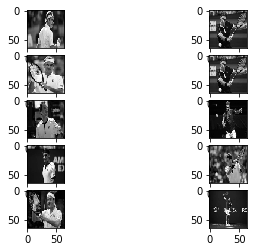

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import sys
import time


class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)


def train(res,train_size,test_size):
    train_images , train_labels, test_images, test_labels = createDataSet(res,train_size,test_size)
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    model = Sequential()
    model.add(Conv2D(64,(3,3),input_shape = train_images.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(64,(3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(1))

    model.add(Activation('sigmoid'))
    model.compile(loss = "binary_crossentropy",optimizer = 'adam',metrics=['accuracy'])
    
    time_callback = TimeHistory()
    
    
    model.fit(train_images,train_labels,callbacks = [time_callback],batch_size = 32,epochs = 10, validation_split = 0.1)
    print("*****************************************")
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    

    times = time_callback.times
    #print(sum(times))
    
    
    feds = prepOutliers(64)

    feds = feds / 255.0
    pred = model.predict_classes(feds)
    print(pred)

    
    print('Test accuracy:', test_acc)
    
    
    model.save("./model")
    
   

train(64,60,10)
#train(64,600,100)

#train(32,60,10)
#train(32,600,100)